In [ ]:
import matplotlib.pyplot as plt

# Theoretical questions

The system (5) can be written as a problem on the form $Ax=b$, equivalently

$$
\begin{bmatrix}
D_{1,1} + \lambda A_{1,1} & D_{1,2} \\
D_{2,1} & D_{2,2} + \lambda A_{2,2}
\end{bmatrix}
\begin{bmatrix}
u \\
v
\end{bmatrix}
=
b.
$$

All matrices and vectors are of dimensions

$$
D_{1,1},\, D_{1,2},\, D_{2,1},\, D_{2,2},\, A_{1,1}, A_{2,2} \in \mathbb{R}^{(m n) \times (m n)}, \qquad
u,\, v \in \mathbb{R}^{m n}, \qquad
b \in \mathbb{R}^{2 m n}.
$$

$$
(A_{1,1})_{ij} = (A_{2,2})_{ij} =
\begin{cases}
4, & \text{if } i=j,\\
-1, & \text{if } |i-j|=1,\\
-1, & \text{if } |i-j|=m,\\
0, & \text{otherwise.}
\end{cases}
$$

$$
A_{1,1} = A_{2,2} = 
\begin{bmatrix}
4 & -1 &        &        & \cdots &        & -1     &        &        \\
-1& 4  & -1     &        &        & \cdots &        & -1     &        \\
   & -1 & 4     & -1     &        &        & \cdots &        & \ddots \\
   &    & \ddots& \ddots & \ddots &        &        &        &        \\
\vdots&  &       & -1     & 4     & -1     &        &        &        \\
      & \vdots  &        &        & -1     & 4      & -1     &        &        \\
-1    &         & \cdots &        &        & -1     & 4      & -1     &        \\
      & -1      &        & \cdots &        &        & -1     & 4      & -1     \\
      &         & \ddots &        &        &        &        & -1     & 4
\end{bmatrix}.
$$

And the diagonal matrices are

$$
(D_{1,1})_{i,j} =
\begin{cases}
0, & i \ne j, \\[6pt]
\displaystyle

\frac{1}{4} \Big( (I_0 - I_1)_{i+1,\,i} - (I_0 - I_1)_{i,\,i}
\Big)^{2},
& i = j.
\end{cases}
$$


$$
(D_{2,2})_{i,j} =
\begin{cases}
0, & i \ne j, \\[6pt]
\displaystyle

\frac{1}{4} \Big( (I_0 - I_1)_{i,\,i+1} - (I_0 - I_1)_{i,\,i}
\Big)^{2},
& i = j.
\end{cases}
$$

$$
(D_{1,2})_{i,j} = (D_{2,1})_{i,j} = 
\begin{cases}
0, & i \ne j, \\[6pt]
\displaystyle

\frac{1}{4} \Big( (I_0 - I_1)_{i,\,i+1} - (I_0 - I_1)_{i,\,i}
\Big) \Big( (I_0 - I_1)_{i+1,\,i} - (I_0 - I_1)_{i,\,i}
\Big),
& i = j.
\end{cases}
$$


## Properties of the linear system

First we check wether the system is symmetric. 

$$
A^T 
=
 \begin{bmatrix}
D_{1,1} + \lambda A_{1,1} & D_{1,2} \\
D_{2,1} & D_{2,2} + \lambda A_{2,2}
\end{bmatrix}^T
= 
\begin{bmatrix}
D_{1,1}^T + \lambda A_{1,1}^T & D_{2,1}^T \\
D_{1,2}^T & D_{2,2}^T + \lambda A_{2,2}^T
\end{bmatrix}
=
\begin{bmatrix}
D_{1,1} + \lambda A_{1,1} & D_{2,1} \\
D_{1,2}^T & D_{2,2} + \lambda A_{2,2}
\end{bmatrix} = A.
$$

In the final equality we use that $D_{1,2}=D_{2,1}$.

Now we check wether the system is positive (semi-)definite. To do this we do the split

$$
A = \lambda A_1 + A_2 = 
\lambda 
\begin{bmatrix}
 A_{1,1} & 0 \\
 0 & A_{2,2}
\end{bmatrix}
+
\begin{bmatrix}
D_{1,1}  & D_{1,2} \\
D_{2,1} & D_{2,2}
\end{bmatrix}
$$

When looking at the Gershgorin disks of $A_1$ we see that all diagonal entries has the value $a_{ii}=4$, thus all disk centres are at the same point. There are three possibilities for radiuses, that is $r_i\in\{2,3,4\}$. 

The figure below shows the corresponding Gershgorin disks.

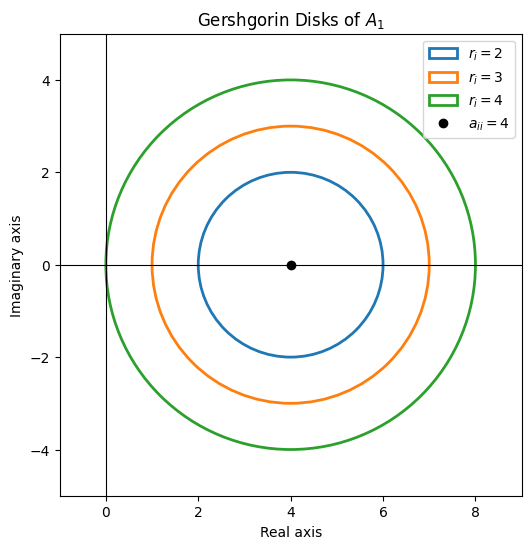

In [ ]:
# Define centers and radii
center = 4
radii = [2, 3, 4]
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create plot
fig, ax = plt.subplots(figsize=(6,6))

# Plot Gershgorin disks
for r, c in zip(radii, colors):
    circle = plt.Circle((center, 0), r, color=c, fill=False, lw=2, label=fr"$r_i={r}$")
    ax.add_patch(circle)

# Mark the center (a_ii = 4)
ax.plot(center, 0, 'ko', label=r"$a_{ii}=4$")

# Axes
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)

# Labels and appearance
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1, 9)
ax.set_ylim(-5, 5)
ax.set_xlabel("Real axis")
ax.set_ylabel("Imaginary axis")
ax.legend()
ax.set_title("Gershgorin Disks of $A_1$")

plt.show()


If a eigenvalue is on the boundary of the union of a set of connected Gershgorin disks, then it is on the boundary of all the gershgorin disks in the connected union. Since only a subset of the disks hit zero, the eigenvalues cannot be zero. Thus all eigenvalues are strictly positive. As $A_1$ is symmetric and all eigenvaleus are strictly positive, it is positive definite.

Now we look at $A_2$.

COMPUTE POSITIVE SEMIDEFINITE.

Knowing $A_1$ is positive definite and $A_2$ is positive semi-definite we get

$$
x^TAx = x^T(\lambda A_1+A_2)x= \lambda x^TA_1x + x^TA_2x \geq \lambda x^TA_1x > 0.
$$

In conclusion the whole system is positive definite.

When applying Dirichlet boundary conditions to (5), the resulting system matrix becomes symmetric and positive definite. This ensures that the **Gauss–Seidel** method converges for any initial guess, while **Jacobi** may converge more slowly or require additional conditions such as diagonal dominance. Furthermore, since (A) is positive definite, the **Conjugate Gradient (CG)** method is guaranteed to converge and is therefore the most efficient choice for solving the system.